#### Shakib Yazdani, Pouya Mirmohammadsadeghi 

In [3]:
import pandas as pd

In [6]:
df = pd.read_excel('drug-dataset.xlsx')

In [7]:
df.head()

,Subject,Treatment,Age,Gender,Before_exp_BP,After_exp_BP
0,D1,1,65,F,103.3,80.5
1,D2,1,59,F,93.6,85.9
2,D3,1,60,M,92.0,85.2
3,D4,1,54,F,93.0,87.8
4,D5,1,65,F,95.4,85.3


In [9]:
from scipy import stats
df['exp_BP_diff'] = df["After_exp_BP"] - df['Before_exp_BP']
stats.shapiro(df['exp_BP_diff'])

(0.9158281683921814, 0.0016718246042728424)

##### As the second paramter of the above tuple is less than 0.05 we can conclude our distribution is not normal
##### According to the fact that the number of our data is bigger than 30 we can use 'Central limit theorem'



(array([ 3.,  1.,  0.,  3.,  6.,  7.,  5.,  9., 13.,  3.]),
 array([-26.3 , -23.72, -21.14, -18.56, -15.98, -13.4 , -10.82,  -8.24,
         -5.66,  -3.08,  -0.5 ]),
 <a list of 10 Patch objects>)

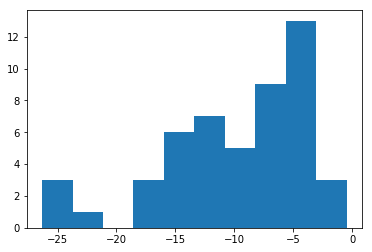

In [11]:
import matplotlib.pyplot as plt
plt.hist(df["exp_BP_diff"])

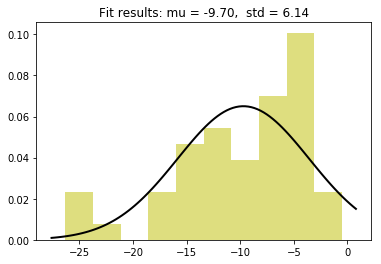

In [16]:
import numpy as np
from scipy.stats import norm


# Generate some data for this demonstration.
#data = norm.rvs(10.0, 2.5, size=500)

# Fit a normal distribution to the data:
mu, std = norm.fit(df["exp_BP_diff"])

# Plot the histogram.
plt.hist(df["exp_BP_diff"], bins=10, normed=True, alpha=0.5, color='y')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

### Point Estimate:
Obtaining a sample of size 20 from our data :


In [17]:
df['exp_BP_diff'].sample(n=20, random_state=1)

27   -16.4
35    -3.3
40    -3.6
38    -4.8
2     -6.8
3     -5.2
48   -11.1
29    -4.8
46    -4.0
31    -6.1
32    -0.5
39    -5.7
21   -15.0
36    -5.3
19   -18.1
42    -4.7
49    -5.7
26    -8.8
22    -9.5
13   -14.2
Name: exp_BP_diff, dtype: float64

In [18]:
sample = df['exp_BP_diff'].sample(n=20, random_state=1)

#### Sample Mean

In [19]:
sample.mean()

-7.6800000000000015

#### sample standard deviation

In [20]:
sample.std()

4.8465505910470945

### Confidence Interval Estimate 

In [21]:
import scipy.stats as st

st.t.interval(0.95, len(sample)-1, loc=np.mean(sample), scale=st.sem(sample))

(-9.94825549805297, -5.411744501947035)

In [23]:
alpha = 0.05               # significance level = 5%
n = len(sample)               # sample sizes
s2 = np.var(sample, ddof=1)   # sample variance
df = n - 1                 # degrees of freedom

upper = (n - 1) * s2 / stats.chi2.ppf(alpha / 2, df)
lower = (n - 1) * s2 / stats.chi2.ppf(1 - alpha / 2, df)
(lower, upper)

(13.584791174103835, 50.10847966234107)

#### T-test:
T-test for mean

In [24]:
from scipy.stats import ttest_ind

stats.ttest_1samp(sample, 35)

Ttest_1sampResult(statistic=-39.38280617806252, pvalue=1.1126041059567549e-19)

The assumption is that the mean of population is greater than 35, and on account of the fact that pvalue is less than alpha, it can be concluded that our null hypothesis is not valid

#### T test for two subpopulation :

In [32]:
df = pd.read_excel('drug-dataset.xlsx')
df['exp_BP_diff'] = df["After_exp_BP"] - df['Before_exp_BP']

sample = df.sample(n=24, random_state=1)

seperating dataframe by gender, male and female :

In [33]:
score_female = sample[sample["Gender"] == "F"]["exp_BP_diff"]
score_male = sample[sample['Gender'] == 'M']["exp_BP_diff"]
stats.ttest_ind(score_female, score_male)

Ttest_indResult(statistic=-1.2482121348476554, pvalue=0.22507489801067618)

We assumed that the means of the two samples (male samples and female samples) are equal, but as pvalue indicates they are not equal

### F Test :

In [34]:
stats.f_oneway(score_female, score_male)

F_onewayResult(statistic=1.5580335335809414, pvalue=0.22507489801067618)


We assumed that the variances of the two samples are equal, but the value of pvalue indicates that they are not